Project Case Scenario
Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

Task 1: Become familiar with the dataset.
The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from js import fetch
import io

<ipython-input-1-3409dbd60c22>:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task 2: Generate Descriptive Statistics and Visualizations 

For all visualizations, please include a title in each graph and appropriate labels 

Generate the following and explain your findings: 

1) For the "Median value of owner-occupied homes" provide a boxplot 

2) Provide a bar plot for the Charles river variable 

3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) 

4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship? 

5) Create a histogram for the pupil to teacher ratio variable


Median Value of Owner-Occupied Homes

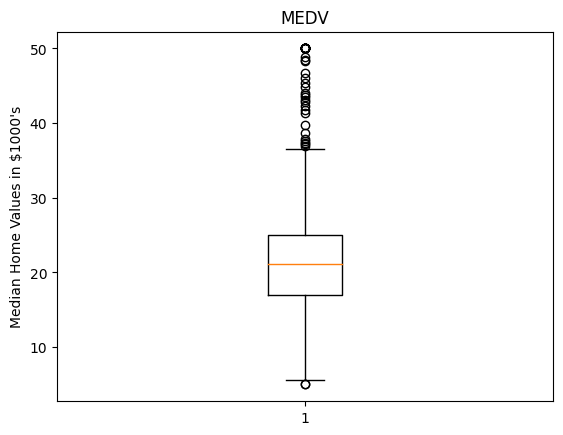

In [4]:
medv_data = boston_df['MEDV']
pyplot.boxplot(medv_data)
pyplot.title('MEDV')
pyplot.ylabel('Median Home Values in $1000\'s')
pyplot.show()

Charles River

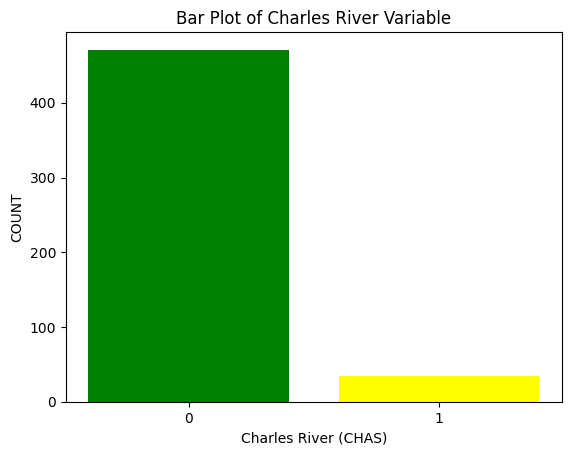

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [5]:
chas_counts = boston_df['CHAS'].value_counts()

pyplot.bar(chas_counts.index, chas_counts.values, color=['green', 'yellow'])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (CHAS)')
pyplot.ylabel('COUNT')
pyplot.xticks(chas_counts.index)
pyplot.show()
chas_counts.index

MEDV Variable vs AGE Variable

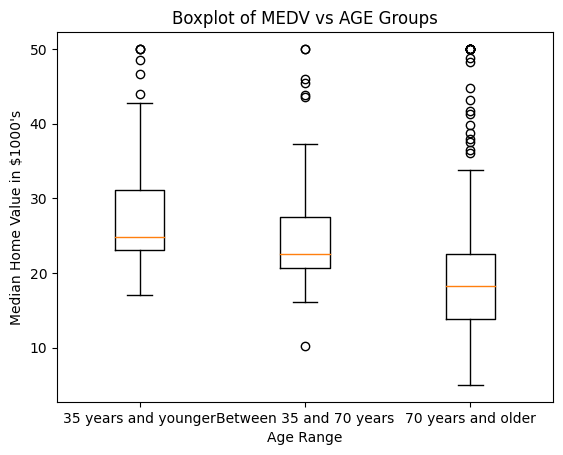

In [6]:
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Range'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

pyplot.boxplot([boston_df[boston_df['AGE_Range'] == label]['MEDV'] for label in labels], labels=labels)
pyplot.title('Boxplot of MEDV vs AGE Groups')
pyplot.xlabel('Age Range')
pyplot.ylabel('Median Home Value in $1000\'s')
pyplot.show()

Relationship Between NOX Concentrations and the Proportion of Non-Retail Business Acres Per Town

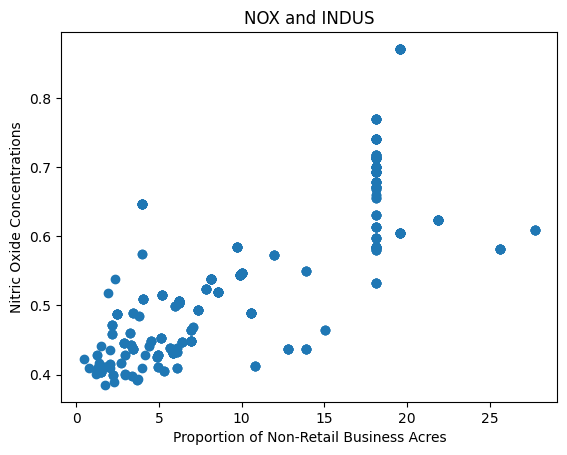

In [7]:
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'])

pyplot.title('NOX and INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres')
pyplot.ylabel('Nitric Oxide Concentrations')

pyplot.show()

Pupil Teacher Ratio By Town

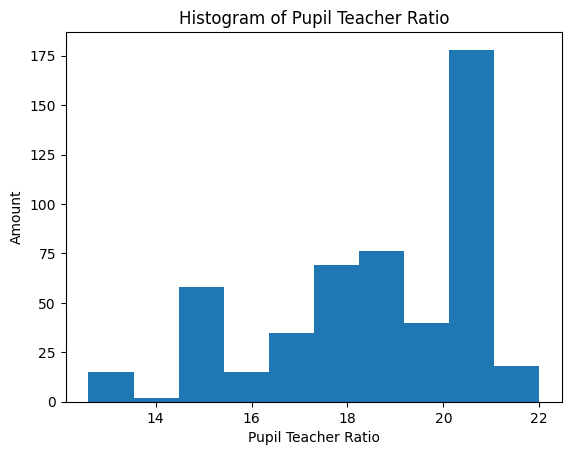

In [8]:
pyplot.hist(boston_df['PTRATIO'], bins=10)

pyplot.title('Histogram of Pupil Teacher Ratio')
pyplot.xlabel('Pupil Teacher Ratio')
pyplot.ylabel('Amount')

pyplot.show()

Task 3: Use the appropriate tests to answer the questions provided. 

For each of the following questions; 

Question 1:
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) 

Question 2:
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) 

Question 3:
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) 

Question 4:
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) 

Be sure to: 

State your hypothesis. 

Use α = 0.05 

Perform the test Statistics. 

State the conclusion from the test. 

Question 1: We will use a t-test to determine if there is a significant difference in median value of houses bounded by the Charles River.

For the Null Hypothesis it will mean there is no significant difference in median values of houses bounded by the Charles River.

For the Alternative Hypothesis it will mean there is a significant difference.

In [9]:
from scipy.stats import ttest_ind

chas_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(chas_bound, chas_not_bound)

print('The p-value is ', p_value)

The p-value is  7.390623170519905e-05


This p-value is smaller than the significance level of 0.05 so we can reject the Null Hypothesis. It means that there is a significant difference in the median values of houses.

Question 2: To test the difference in median values of houses for owner-occupied units built prior to 1940 we will use the ANOVA test.

For the Null Hypothesis it will mean there is no significant difference in median values of houses across different owner occupied units built prior to 1940.

For the Alternative Hypothesis it will mean there is a significant difference.

In [10]:
from scipy.stats import f_oneway

boston_df['AGE_Range'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

f_stat, p_value = f_oneway(boston_df[boston_df['AGE_Range'] == '35 years and younger']['MEDV'],
                            boston_df[boston_df['AGE_Range'] == 'Between 35 and 70 years']['MEDV'],
                            boston_df[boston_df['AGE_Range'] == '70 years and older']['MEDV'])

print('p-value:', p_value)

p-value: 1.7105011022702984e-15


This p-value is smaller than the significance level of 0.05 so we can reject the Null Hypothesis. It means that there is a significant difference in the median values of houses built prior to 1940.

Question 3: We will use the Pearson correlation coefficient to determine whether there is a relationship between NOX and INDUS.

In [11]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


With a small p-value and a Pearson Correlation Coefficient of 0.76 there is evidence to reject the null hypothesis and state that there is no relationship betwene NOX and INDUS.

In [ ]:
Question 4: 

In [14]:
from sklearn.linear_model import LinearRegression

X = boston_df[['DIS']]
y = boston_df['MEDV']

model = LinearRegression()
model.fit(X, y)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print('Intercept (beta_0):', beta_0)
print('Coefficient for DIS (beta_1):', beta_1)

Intercept (beta_0): 18.39008833049338
Coefficient for DIS (beta_1): 1.0916130158411106
